In [1]:
import pandas as pd

players_file_path = 'data/Players.csv'
players_data = pd.read_csv(players_file_path)

players_data.head(), players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   surname   595 non-null    object
 1   team      595 non-null    object
 2   position  595 non-null    object
 3   minutes   595 non-null    int64 
 4   shots     595 non-null    int64 
 5   passes    595 non-null    int64 
 6   tackles   595 non-null    int64 
 7   saves     595 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.3+ KB


(     surname     team    position  minutes  shots  passes  tackles  saves
 0     Abdoun  Algeria  midfielder       16      0       6        0      0
 1    Belhadj  Algeria    defender      270      1     146        8      0
 2  Boudebouz  Algeria  midfielder       74      3      28        1      0
 3  Bougherra  Algeria    defender      270      1      89       11      0
 4   Chaouchi  Algeria  goalkeeper       90      0      17        0      2,
 None)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Average minutes played by players in each position

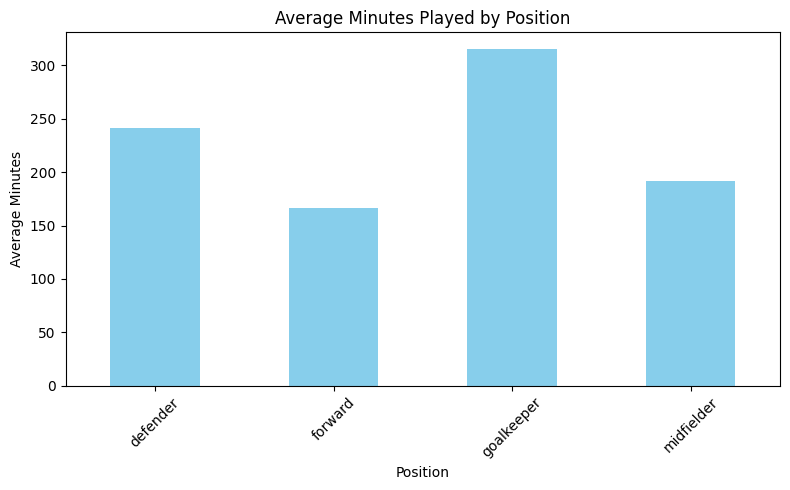

In [10]:
avg_minutes_by_position = players_data.groupby('position')['minutes'].mean()
plt.figure(figsize=(8, 5))
avg_minutes_by_position.plot(kind='bar', color='skyblue')
plt.title('Average Minutes Played by Position')
plt.ylabel('Average Minutes')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Wins, draws, and losses plot

In [11]:
teams_data = pd.read_csv('data/Teams.csv')

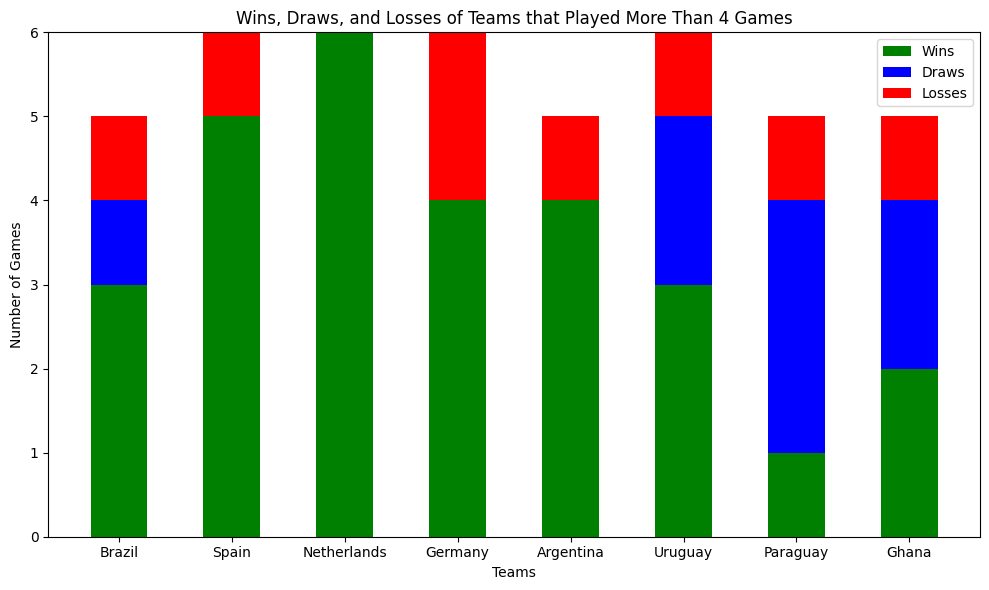

In [12]:
filtered_df = teams_data[teams_data["games"] > 4]

teams = filtered_df["team"]
wins = filtered_df["wins"]
draws = filtered_df["draws"]
losses = filtered_df["losses"]

x = np.arange(len(teams))  
width = 0.5  

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, wins, width, label='Wins', color='green')
ax.bar(x, draws, width, bottom=wins, label='Draws', color='blue')
ax.bar(x, losses, width, bottom=wins + draws, label='Losses', color='red')

ax.set_xlabel('Teams')
ax.set_ylabel('Number of Games')
ax.set_title('Wins, Draws, and Losses of Teams that Played More Than 4 Games')
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend()

plt.tight_layout()
plt.show()

3. The relative percentage of teams with 0, 1, and 2 red cards.

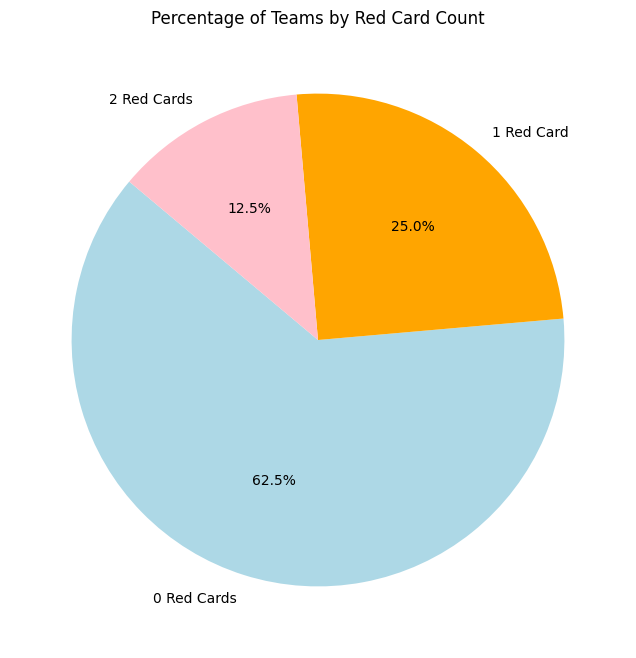

In [13]:
red_card_counts = teams_data["redCards"].value_counts().sort_index()

labels = ['0 Red Cards', '1 Red Card', '2 Red Cards']

plt.figure(figsize=(8, 8))
plt.pie(
    red_card_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'orange', 'pink']
)

plt.title('Percentage of Teams by Red Card Count')

plt.show()

4. Scatterplot of passes vs. minutes

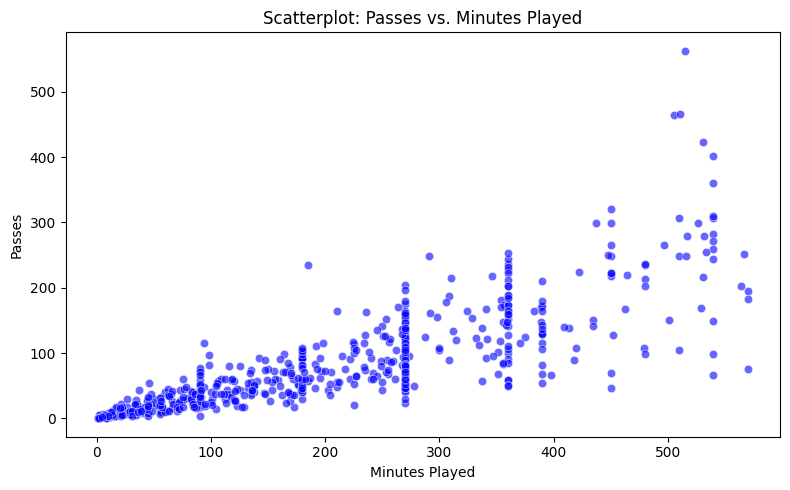

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='minutes', y='passes', data=players_data, color='blue', alpha=0.6)
plt.title('Scatterplot: Passes vs. Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Passes')
plt.tight_layout()
plt.show()

There are **some line of dots** (vertical) because players with similar roles (e.g., goalkeeper or midfielder) may spend varying amounts of time on the field while contributing a consistent number of passes.

5. Map of countries colored by "goalsFor"

<Figure size 1200x800 with 0 Axes>

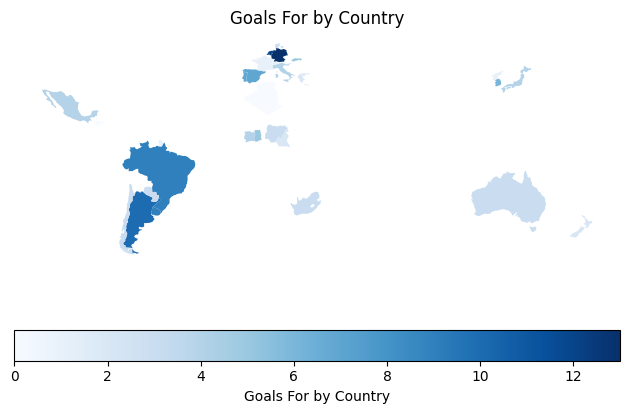

In [25]:
import geopandas as gpd

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

# Merge goalsFor data with country data
world_goals = world.merge(teams_data, how='left', left_on='ADMIN', right_on='team')

# Plot the map
plt.figure(figsize=(12, 8))
world_goals.plot(
    column='goalsFor', cmap='Blues', legend=True,
    legend_kwds={'label': "Goals For by Country", 'orientation': "horizontal"}
)
plt.title('Goals For by Country')
plt.axis('off')
plt.tight_layout()
plt.show()

6. Create a pie chart showing the relative percentage of players making <= 0.25 passes per minute, >= 0.5 passes per minute, and between 0.25 and 0.5.

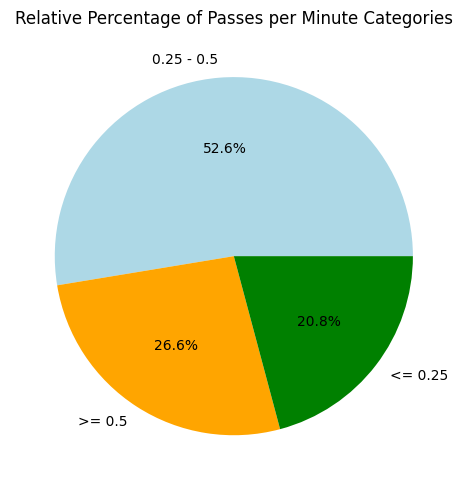

In [26]:
players_data['passes_per_minute'] = players_data['passes'] / players_data['minutes']
categories = pd.cut(
    players_data['passes_per_minute'],
    bins=[-float('inf'), 0.25, 0.5, float('inf')],
    labels=['<= 0.25', '0.25 - 0.5', '>= 0.5']
)
category_counts = categories.value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange', 'green'])
plt.title('Relative Percentage of Passes per Minute Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()